# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [1]:
# PyTorch imports
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
torch.multiprocessing.set_sharing_strategy('file_system')
torch.manual_seed(160153684)

In [2]:
# Loading in the CIFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook

# takes in a data loader and scale and returns a tuple of (image, noisey_image, label)
def preparedata(loader, scale):
    images_noisey, images_orig, images_labels = ([],[],[])
    for i, (images, labels) in enumerate(tqdm_notebook(loader)):
        #Apply noise to the image batch and clip to range (-1,1)
        images_noise = np.clip(images + (scale * torch.randn((3,32,32))),-1, 1)
        images_noisey.append(images_noise)
        images_orig.append(images)
        images_labels.append(labels)
    return(images_orig, images_noisey, images_labels)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
        
scale = 0.2
# Adding random noise to the training and testing data
print("Applying noise to train images")
train_orig, train_noise, train_labels = preparedata(trainloader, scale)
print("Applying noise to test images")
test_orig, test_noise, test_labels = preparedata(testloader, scale)

Applying noise to train images



Applying noise to test images


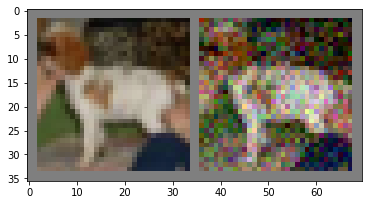

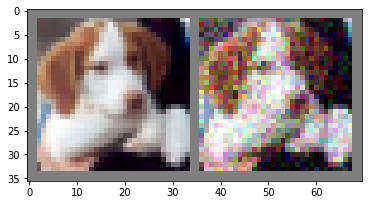

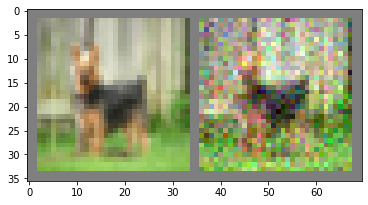

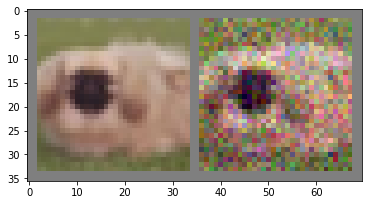

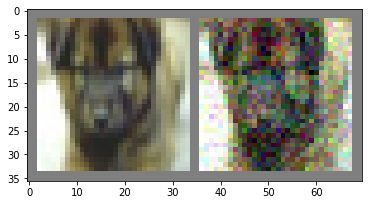

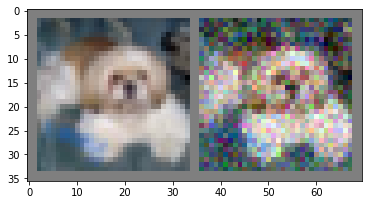

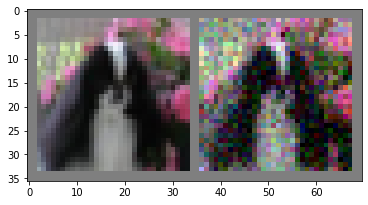

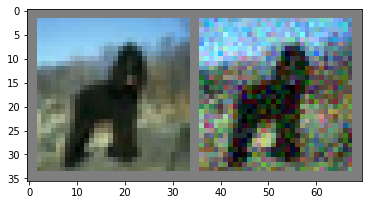

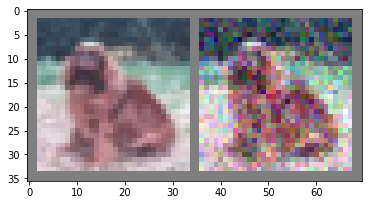

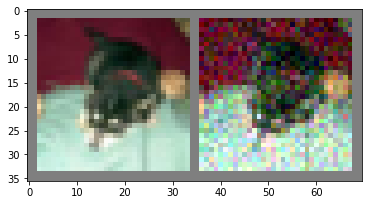

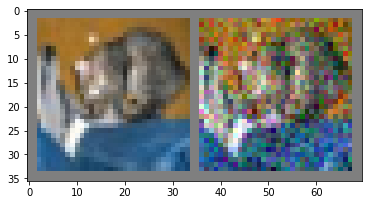

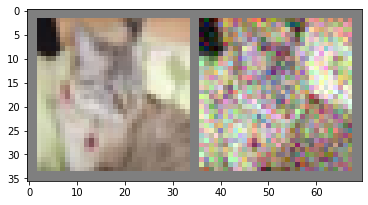

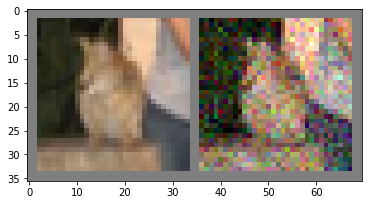

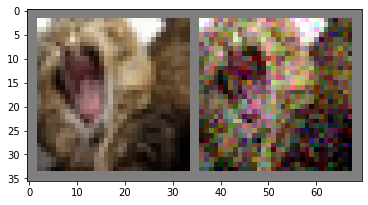

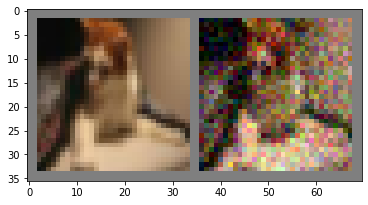

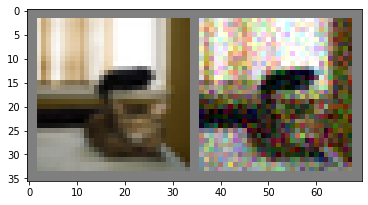

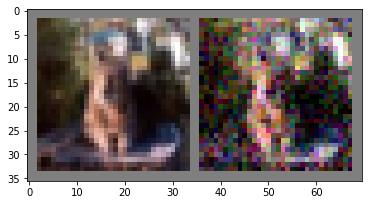

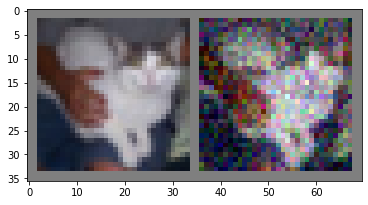

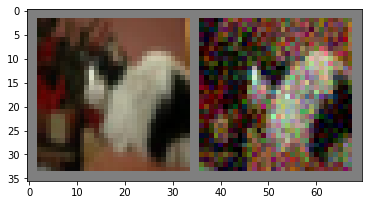

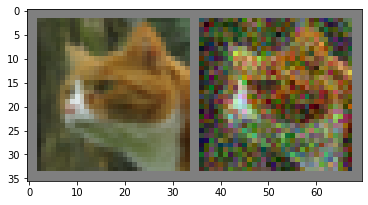

In [4]:
#Define classes (Cat, Dog)
classes = [3,5]
number_to_display = 10
CatDog_test_orig, CatDog_test_noise, CatDog_test_labels = ([],[],[])
cats, dogs = ([], [])
#Loop through the label batches and find all cats and dogs
for i, labels in enumerate(test_labels):
    for j, label in enumerate(labels):  
        if label in classes:
            
            if label == 5 and len(dogs) < 10:
                dogs.append(torchvision.utils.make_grid([test_orig[i][j],test_noise[i][j]]))
            if label == 3 and len(cats) < 10:
                cats.append(torchvision.utils.make_grid([test_orig[i][j],test_noise[i][j]]))
                
            CatDog_test_orig.append(np.transpose(test_orig[i][j].numpy(), (1, 2, 0)))
            CatDog_test_labels.append(label.numpy())
            CatDog_test_noise.append(np.transpose(test_noise[i][j].numpy(),(1,2,0)))
                
CatDog_train_orig, CatDog_train_noise, CatDog_train_labels = ([],[],[])

for i, labels in enumerate(train_labels):
    for j, label in enumerate(labels):
           if label in classes:
                CatDog_train_orig.append(np.transpose(train_orig[i][j].numpy(),(1,2,0)))
                CatDog_train_labels.append(label.numpy())
                CatDog_train_noise.append(np.transpose(train_noise[i][j].numpy(),(1,2,0)))

#Numpy Conversions
CatDog_train_orig = np.array(CatDog_train_orig)
CatDog_test_orig = np.array(CatDog_test_orig)
CatDog_train_noise = np.array(CatDog_train_noise)
CatDog_test_noise = np.array(CatDog_test_noise)

# Show 10 cats and 10 dogs
for image in (dogs):
    imshow(image)
    
for image in (cats):
    imshow(image)

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [5]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
plt.style.use('ggplot')


# Flatten the images to 1-dimension ready for PCA
X_train = CatDog_train_orig.reshape(CatDog_train_orig.shape[0],-1)
X_test = CatDog_test_orig.reshape(CatDog_test_orig.shape[0],-1)
y_test = CatDog_test_labels
y_train = np.array(CatDog_train_labels).ravel()

# Traning the model without PCA
model = GaussianNB()
model.fit(X_train, y_train)
# Make prediction on the test set
y_pred = model.predict(X_test)
og_accuracy = metrics.accuracy_score(y_test, y_pred)
print(og_accuracy)

0.5935


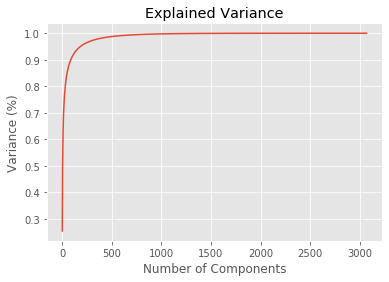

In [6]:
#Fitting the PCA algorithm with the training data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [7]:
def pca_classifyNB(X, y, X_test, y_test, k):
    #Perform PCA fitting to train data(X)
    pca = PCA(n_components=k).fit(X)
    X_pca = pca.transform(X)
    model = GaussianNB()
    model.fit(X_pca, y);
    #Transform the testing data   
    X_test_pca = pca.transform(X_test)
    y_pred = model.predict(X_test_pca)
    #Record metrics
    a = metrics.accuracy_score(y_test,y_pred)
    roc = metrics.roc_curve(y_test, y_pred, pos_label=5)
    aroc = metrics.roc_auc_score(y_test, y_pred)
    return a, roc, aroc

### Choice of Components (2a)
- In order to choose the 7 values of k for PCA I plotted the cumalative sum of explained variance from the train data (see above) to identify a component range. I then selected the range (10, 100) and used np.linspace to get 7 values.

### Choice of Classifier type (2b)
- I chose to use a Gaussian Naive Bayes classifier on the images because the feature values are continuous.

In [8]:
#2a
accuracy, roc, aroc = ([],[],[])
k = list(np.linspace(10, 100, 7, dtype=int))

#perform PCA and classify for each k
for num_components in k:
    a, k_roc, k_aroc = pca_classifyNB(X_train, y_train, X_test, y_test, num_components)
    accuracy.append(a)
    roc.append(k_roc)
    aroc.append(k_aroc)
    

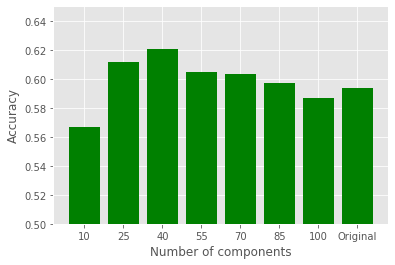

In [9]:
def plt_accuracy(y, k):
    k_x = k.copy()
    k_x.append("Original")
    y_x = y.copy()
    y_x.append(og_accuracy)
    y_pos = np.arange(len(k_x))
    plt.bar(y_pos, y_x, color='green')
    plt.ylim(0.5,0.65)
    plt.xticks(y_pos, k_x)
    plt.ylabel('Accuracy')
    plt.xlabel('Number of components')
    plt.show()

plt_accuracy(accuracy, k)

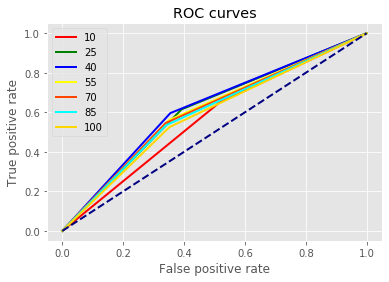

In [10]:
colorarray = ['red', 'green', 'blue', 'yellow', 'orangered', 'cyan', 'gold']
for i, (fpr, tpr, _) in enumerate(roc):
    plt.plot(fpr, tpr, color=colorarray[i],lw=2, label=k[i])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curves")
plt.legend()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

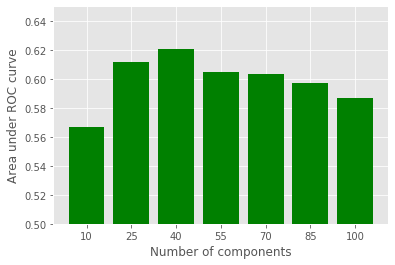

In [11]:
def plt_aroc(y, k):
    y_pos = np.arange(len(k))
    plt.bar(y_pos, y, color='green')
    plt.ylim(0.5,0.65)
    plt.xticks(y_pos, k)
    plt.ylabel('Area under ROC curve')
    plt.xlabel('Number of components')
    plt.show()

plt_aroc(aroc, k)

## Interesting observations (2f)

- Using every feature of the image when training produces worse classification results than some classifiers using PCA. This is because some of the pixels(features) in the image dont help with classification. In addition to this using the full images when training could cause the classifier produced to suffer from overfitting.

- The area under the ROC curve is equal to the classification accuracy. This is the case because the classification is only distinguishing between two classes so the the mid point of the curve is just the classification accuracy. This mid point then translates to the area because the other two points intersect with the dotted line.

- When testing for the best values of k before selecting a linearly spaced range I tested every value of k in the range (1, 100) and recorded the accuracy. Interestly all the best values of k were in a very small range around 20-30. I decided to not use these values as it produced rather boring results charts, and also gave no insight into the difference in accuracy between different numbers of components.

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

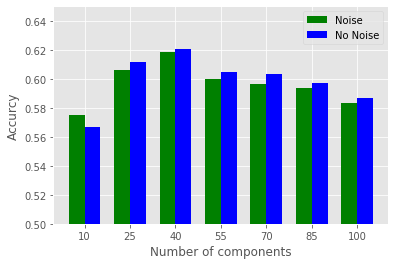

In [12]:
#Reshape noisy images to 1 dimension
X_train = CatDog_train_noise.reshape(CatDog_train_noise.shape[0],-1)
X_test = CatDog_test_noise.reshape(CatDog_test_noise.shape[0],-1)
y_test = CatDog_test_labels
y_train = np.array(CatDog_train_labels).ravel()

accuracy_n, roc, aroc = ([],[],[])
#Apply PCA and classify on the noisy data
for num_components in k:
    a, k_roc, k_aroc = pca_classifyNB(X_train, y_train, X_test, y_test, num_components)
    accuracy_n.append(a)

#Plot comparison
fig, ax = plt.subplots()
y_pos = np.arange(len(k))
y1 = accuracy_n
y2 = accuracy
width = 0.35
ax.bar(y_pos, y1, width,color='green', label="Noise")
ax.bar(y_pos + width, y2, width,color='blue', label="No Noise")
ax.set_xticks(y_pos + width / 2)
ax.set_ylim(0.5, 0.65)
ax.set_ylabel('Accurcy')
ax.set_xlabel('Number of components')
ax.set_xticklabels(k)
ax.autoscale_view()
ax.legend()
plt.show()

In [13]:
Full_test_orig, Full_test_noise, Full_test_labels = ([],[],[])

# Conversion and reshaping of images to numpy arrays
for i, labels in enumerate(test_labels):
    for j, label in enumerate(labels):
        Full_test_orig.append(np.transpose(test_orig[i][j].numpy(), (1, 2, 0)))
        Full_test_labels.append(label.numpy())
        Full_test_noise.append(np.transpose(test_noise[i][j].numpy(),(1,2,0)))
        
Full_train_orig, Full_train_noise, Full_train_labels = ([],[],[])

for i, labels in enumerate(train_labels):
    for j, label in enumerate(labels):
        Full_train_orig.append(np.transpose(train_orig[i][j].numpy(), (1, 2, 0)))
        Full_train_labels.append(label.numpy())
        Full_train_noise.append(np.transpose(train_noise[i][j].numpy(),(1,2,0)))
        
Full_train_orig = np.array(Full_train_orig)
Full_train_noise = np.array(Full_train_noise)
Full_test_orig = np.array(Full_test_orig)
Full_test_noise = np.array(Full_test_noise)

In [14]:
import time
from sklearn.metrics import confusion_matrix

def perf_pca(X, X_test, k):
    #Perform PCA and return the transformed data
    pca = PCA(n_components=k).fit(X)
    X = pca.transform(X)
    X_test = pca.transform(X_test)
    return X, X_test
    
def timed_pca_classifyNB(X, y, X_test, y_test, k, pca=True):
    start = time.perf_counter()
    if(pca): X, X_test = perf_pca(X, X_test, k)
    model = GaussianNB()
    model.fit(X, y);
    train_time = time.perf_counter() - start
    start = time.perf_counter()
    #Predict given the test data
    y_pred = model.predict(X_test)
    a = metrics.accuracy_score(y_test,y_pred)
    test_time = time.perf_counter() - start
    
    return a, train_time, test_time, confusion_matrix(y_test, y_pred)

# Ignore convergence warnings for visual clarity
@ignore_warnings(category=ConvergenceWarning)
def timed_pca_classifyLR(X, y, X_test, y_test, k, pca=True, max_iter=100): # Default value 100
    start = time.perf_counter()
    if(pca): X, X_test = perf_pca(X, X_test, k)
    #Defining the LR classifier
    lr = LogisticRegression(solver="lbfgs", multi_class='auto', max_iter=max_iter)
    lr.fit(X, y)
    train_time = time.perf_counter() - start
    start = time.perf_counter()
    # Prediction using LR model
    y_pred = lr.predict(X_test)
    # Metrics
    a = metrics.accuracy_score(y_test, y_pred)
    test_time = time.perf_counter() - start
    return a, train_time, test_time, confusion_matrix(y_test, y_pred)
    
    

In [15]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Neural network definition - from the pytorch tutorial
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
start = time.perf_counter()
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
cnn_train_time = time.perf_counter() - start
print('Finished Training')

[1,  2000] loss: 2.176
[1,  4000] loss: 1.831
[1,  6000] loss: 1.660
[1,  8000] loss: 1.579
[1, 10000] loss: 1.497
[1, 12000] loss: 1.465
[2,  2000] loss: 1.418
[2,  4000] loss: 1.373
[2,  6000] loss: 1.348
[2,  8000] loss: 1.347
[2, 10000] loss: 1.309
[2, 12000] loss: 1.287
Finished Training


In [16]:
X_train_full = Full_train_orig.reshape(Full_train_orig.shape[0],-1)
X_test_full = Full_test_orig.reshape(Full_test_orig.shape[0],-1)
y_train_full = Full_train_labels
y_test_full = Full_test_labels

In [17]:
# Shows a confusion matrix as an image
def show_cm(cm):
    plt.figure(figsize=(3,3))
    plt.imshow(cm, cmap='viridis')
    plt.show()

### Choosing the number of components (k)
- From the previous section the components that produced the highest classification accuracy were in the range 20 - 40. I used this knowledge to select the components for the different classifier tests. As the PCA step is the same in both sections the features selected should capture the most information from each image.

Classifier: Naive Bayes, Data: Full Set all features, Accuracy: 0.298, Train time(s): 1.57 Test time(s): 3.07


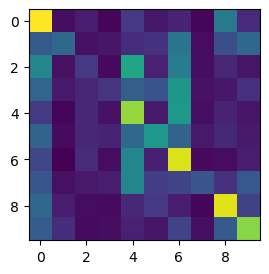

Classifier: Naive Bayes, Data: Full Set with PCA k = 20.0, Accuracy: 0.365, Train time(s): 4.87, Test time(s): 0.03


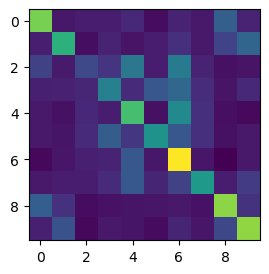

Classifier: Naive Bayes, Data: Full Set with PCA k = 30.0, Accuracy: 0.368, Train time(s): 3.62, Test time(s): 0.04


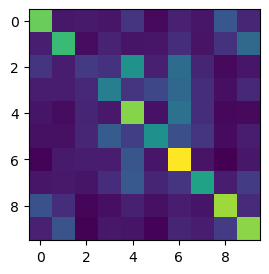

Classifier: Naive Bayes, Data: Full Set with PCA k = 40.0, Accuracy: 0.366, Train time(s): 5.07, Test time(s): 0.05


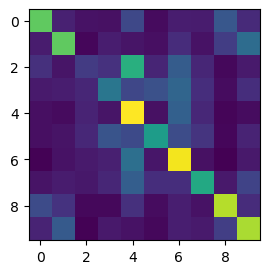

Classifier: Logistic Regression, Data: Full Set,  Accuracy: 0.399, Train time(s): 42.84, Test time(s): 0.18


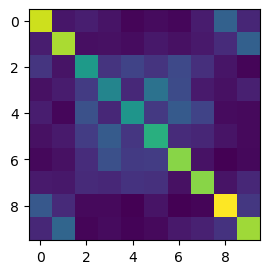

Classifier: Logistic Regression, Data: Full Set with PCA k = 20.0,  Accuracy: 0.364, Train time(s): 8.00, Test time(s): 0.01


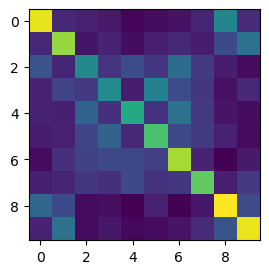

Classifier: Logistic Regression, Data: Full Set with PCA k = 30.0,  Accuracy: 0.371, Train time(s): 6.57, Test time(s): 0.01


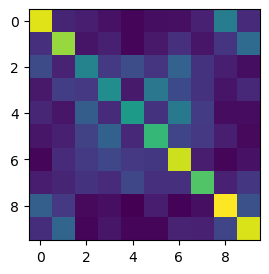

Classifier: Logistic Regression, Data: Full Set with PCA k = 40.0,  Accuracy: 0.373, Train time(s): 8.23, Test time(s): 0.01


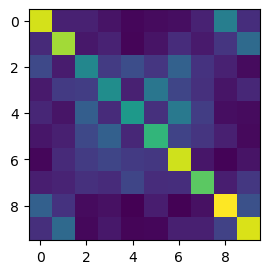

In [18]:
plt.style.use('default')
NB = 4
LR = 4
CNN = 4
k = [20, 30, 40]
results = []
for i in range(NB):
    if(i==0):
        a, t_time, tst_time , cm= timed_pca_classifyNB(X_train_full, y_train_full, X_test_full, y_test_full, k[i], pca=False)  
        print("Classifier: Naive Bayes, Data: Full Set all features, Accuracy: %.3f, Train time(s): %.2f Test time(s): %.2f"
               % (a, t_time, tst_time))
        results.append(("NBFull",(a,t_time,tst_time)))
        show_cm(cm)
    else:
        a, t_time, tst_time, cm  = timed_pca_classifyNB(X_train_full, y_train_full, X_test_full, y_test_full, k[i-1])
        print("Classifier: Naive Bayes, Data: Full Set with PCA k = %.1f, Accuracy: %.3f, Train time(s): %.2f, Test time(s): %.2f"
            % (k[i-1], a, t_time, tst_time))
        results.append(("NB k=" + str(k[i-1]),(a, t_time, tst_time)))
        show_cm(cm)
                                           
for i in range(LR):
    if(i==0):
        a, t_time, tst_time, cm  = timed_pca_classifyLR(X_train_full, y_train_full, X_test_full, y_test_full, k[i],pca=False)
        print("Classifier: Logistic Regression, Data: Full Set,  Accuracy: %.3f, Train time(s): %.2f, Test time(s): %.2f"
            % (a, t_time, tst_time))
        results.append(("LRFull", (a, t_time, tst_time)))
        show_cm(cm)
    else:
        a, t_time, tst_time, cm  = timed_pca_classifyLR(X_train_full, y_train_full, X_test_full, y_test_full, k[i-1])
        print("Classifier: Logistic Regression, Data: Full Set with PCA k = %.1f,  Accuracy: %.3f, Train time(s): %.2f, Test time(s): %.2f"
            % (k[i-1], a, t_time, tst_time))
        results.append(("LR k=" + str(k[i-1]),(a, t_time, tst_time)))
        show_cm(cm)

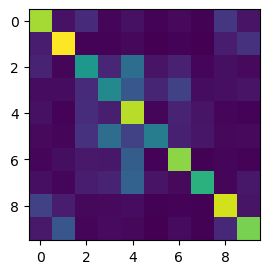

Classifier: CNN, Data: Full set, Accuracy: 0.54


In [19]:
correct = 0
total = 0
start = time.perf_counter()
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for label in predicted:
            y_pred.append(label)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
cnn_test_time = time.perf_counter() - start
accuracy = correct/total
show_cm(confusion_matrix(y_test_full, y_pred))
print("Classifier: CNN, Data: Full set, Accuracy: %.2f" % (accuracy))
results.append(("CNN", (accuracy, cnn_train_time, cnn_test_time)))

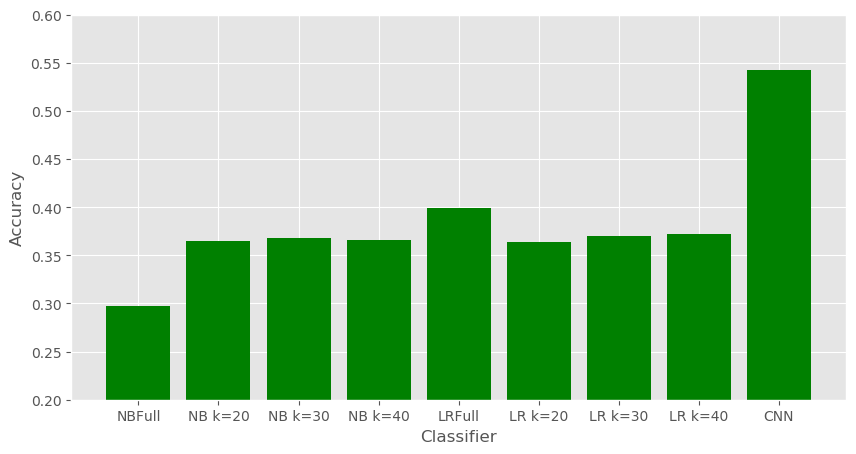

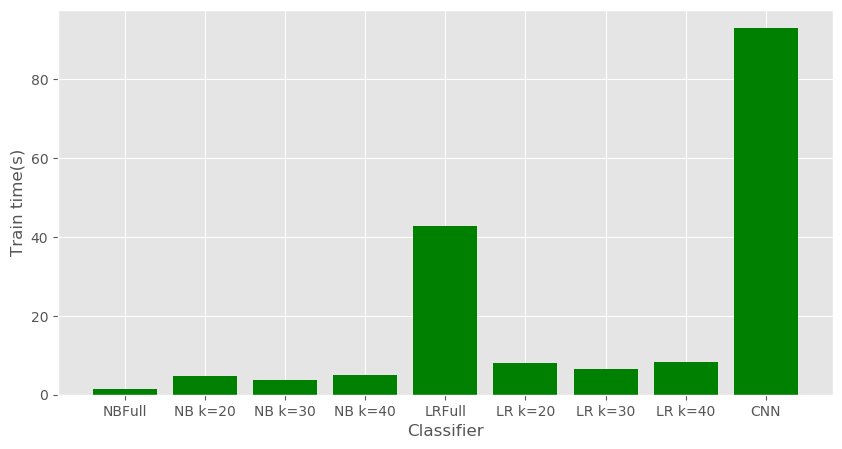

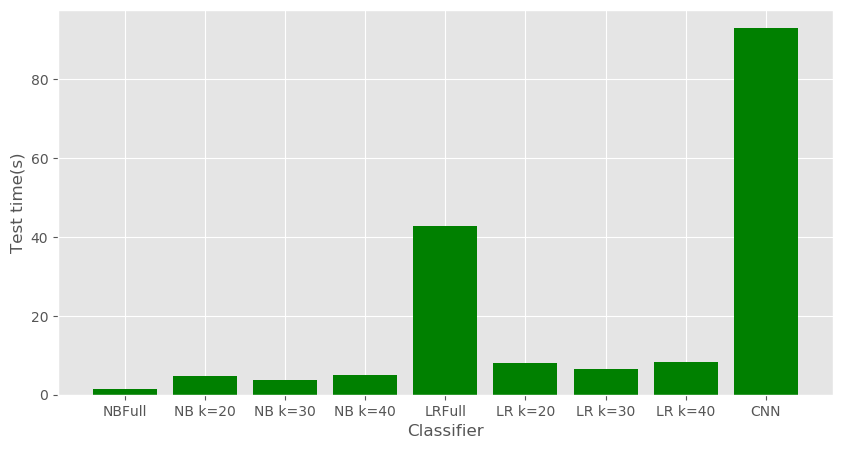

In [20]:
plt.style.use('ggplot')
labels = list(zip(*results))[0]
values = list(zip(*results))[1]

accuracy = [val[0] for val in values]
train_time = [val[1] for val in values]
test_time = [val[1] for val in values]

plt.figure(figsize=(10,5))
y_pos = np.arange(len(labels))
plt.bar(y_pos, accuracy, color='green')
plt.xticks(y_pos, labels)
plt.ylim(0.2, 0.6)
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(y_pos, train_time, color='green')
plt.xticks(y_pos, labels)
plt.ylabel('Train time(s)')
plt.xlabel('Classifier')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(y_pos, test_time, color='green')
plt.xticks(y_pos, labels)
plt.ylabel('Test time(s)')
plt.xlabel('Classifier')
plt.show()

### Confusion matrices (3e)
- The confusion matrices for the 8 classifiers are shown when the other metrics of the classification are printed. The confusion matrix for the CNN is shown along with the classification results for the CNN.

### Interesting Observations (3f)
- One interesting observation when comparing the results of the Naive Bayes classifier on the noisy and normal data is how similar the accuracies are. This suggests that the added noise has minimal effect on the class seperation therfore not having much impact on the final classification.
- Following on from the first observation it is also apparent that the effect of the added noise reduces with respect to the number of components used with PCA.
- Looking at the confusion matrices for each classifier shows which classes were seperated well and which werent. From this we can see that class 3 (cat) is one of the hardest classes to seperate along with class 5 (dog) this could be related as the two are both similar, and in a low resolution environment can be hard to tell apart.
- The best classifier by a large margin was the Convolutional Neural Network this was the case when it was only trained on a small number of epochs (2). However this came at a price, the training and test time for the Neural network was significantly larger than the other classification methods.
- Finally, the logistic regression classifier struggled to converge regardlesss on the number of iterations specified. When testing different iterations numbers the accuracy benefit of using a large number of iterations was minimal. In the end I chose a small number of iterations to keeping training time down and disabled the convergence warnings produced by sklean to aid visual clarity.

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 3 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.Tanh(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.Tanh(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.Tanh(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    

myAE=Autoencoder()

    
#Hyperparameters for training
batch_size=64
learning_rate=0.001
max_epochs = 20

# Extract a subset of size 1000 in batches
subset_indices = np.random.choice(len(trainset), 1000)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=False, num_workers=2, sampler=torch.utils.data.sampler.SubsetRandomSampler(subset_indices))
testloader = torch.utils.data.DataLoader(testset, batch_size=1,shuffle=True, num_workers=2)

scale = 0.2
#Adding noise the newly loaded in data
print("Preparing train data in batchsizes of %d" % (batch_size))
trainorig, trainnoise, _ = preparedata(trainloader, scale)

#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Storage
outputs = []

#Start training
for epoch in range(max_epochs):
    for i, data in enumerate((trainnoise)):
        img = data
        oimg = trainorig[i]
        optimizer.zero_grad()
        recon = myAE(img)
        loss = criterion(recon, oimg)
        loss.backward()
        optimizer.step()            
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)

Preparing train data in batchsizes of 64



Epoch:1, Loss:0.1891
Epoch:2, Loss:0.1197
Epoch:3, Loss:0.0932
Epoch:4, Loss:0.0765
Epoch:5, Loss:0.0663
Epoch:6, Loss:0.0584
Epoch:7, Loss:0.0598
Epoch:8, Loss:0.0500
Epoch:9, Loss:0.0458
Epoch:10, Loss:0.0423
Epoch:11, Loss:0.0396
Epoch:12, Loss:0.0373
Epoch:13, Loss:0.0352
Epoch:14, Loss:0.0333
Epoch:15, Loss:0.0317
Epoch:16, Loss:0.0304
Epoch:17, Loss:0.0295
Epoch:18, Loss:0.0297
Epoch:19, Loss:0.0309
Epoch:20, Loss:0.0303


In [22]:
testorig, testnoise, _ = preparedata(testloader, scale)

results_autoencode = []
# Testing on the test data
for i, data in enumerate(tqdm_notebook(testnoise)):
    img = data
    oimg = testorig[i]
    recon = myAE(img)
    loss = criterion(recon, oimg)
    results_autoencode.append((img, oimg, recon, loss))                            

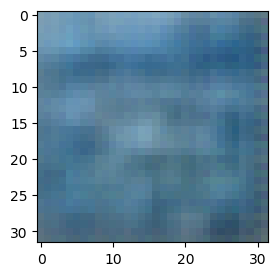

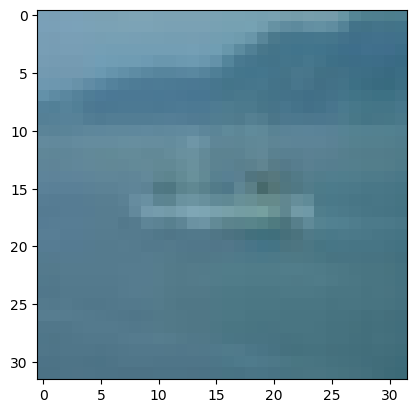

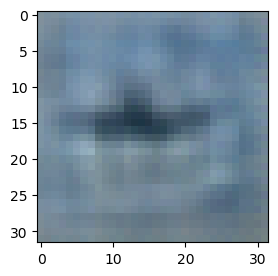

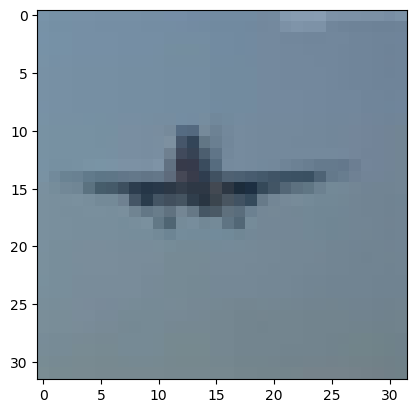

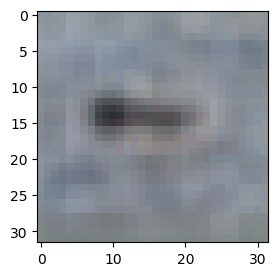

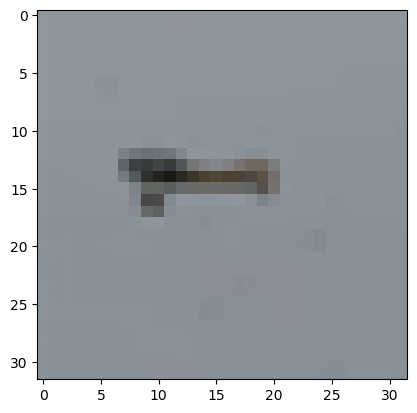

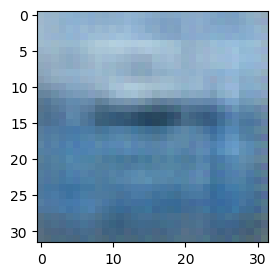

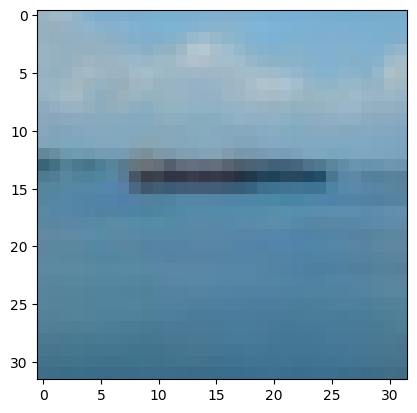

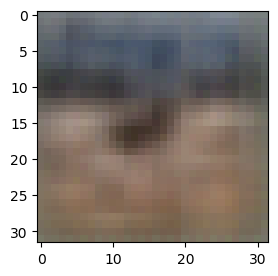

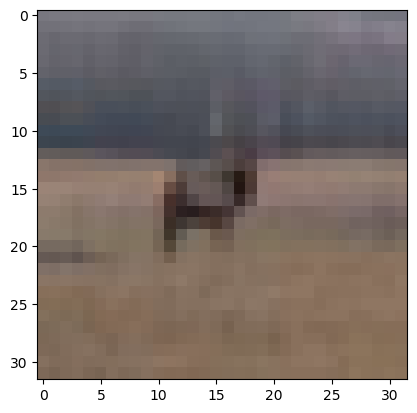

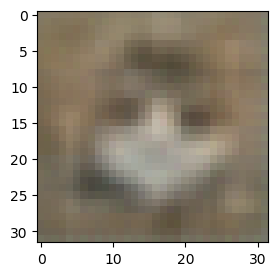

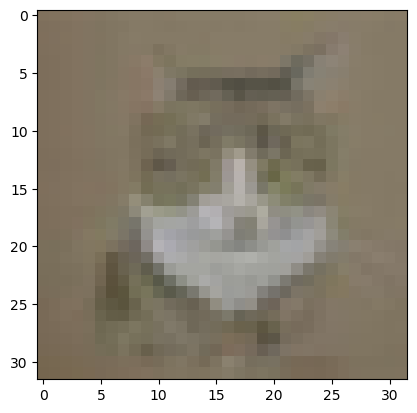

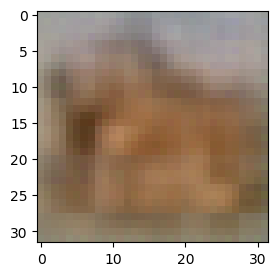

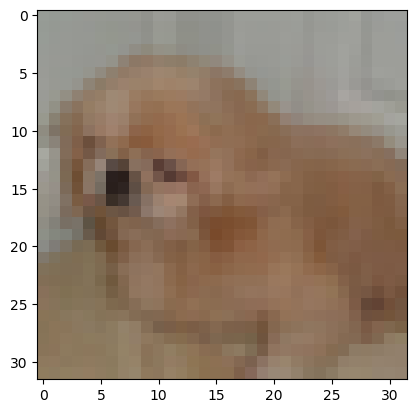

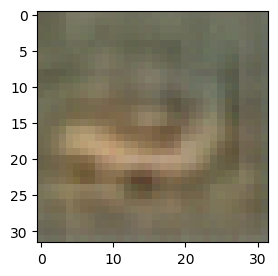

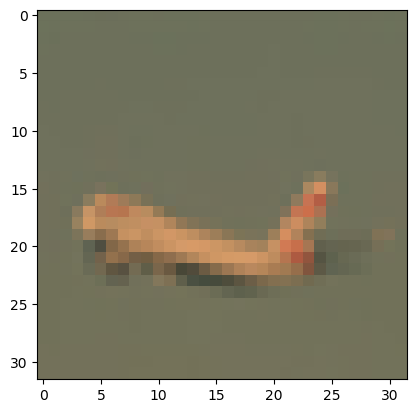

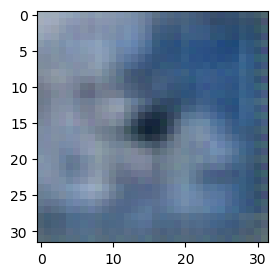

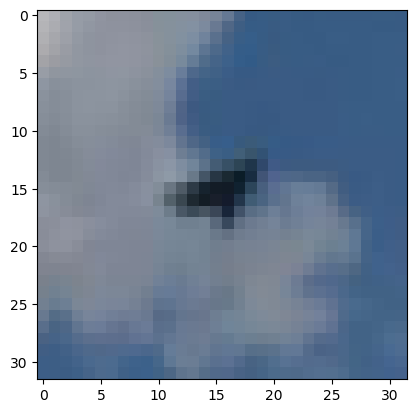

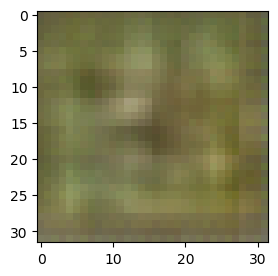

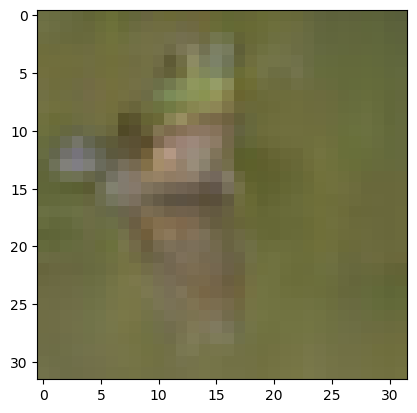

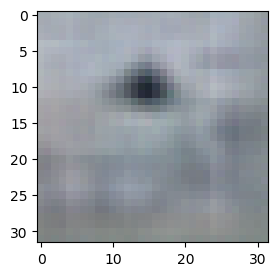

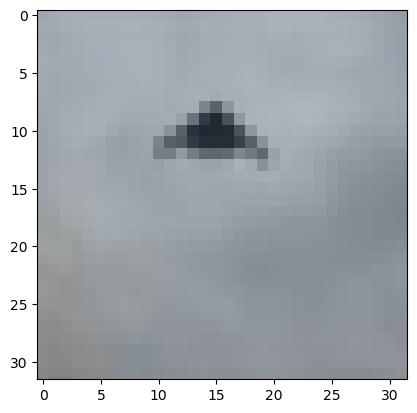

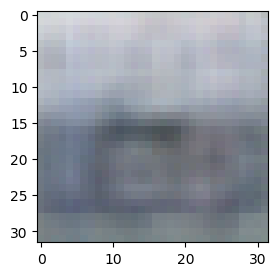

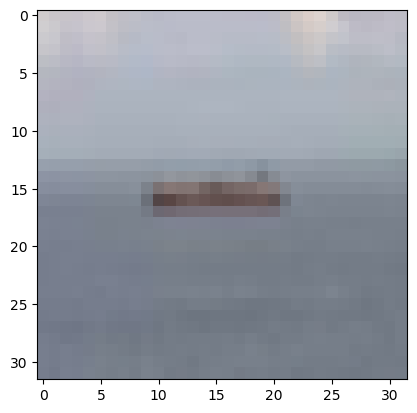

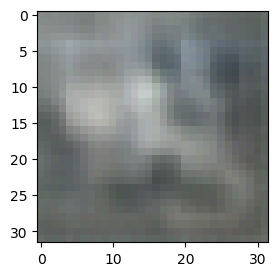

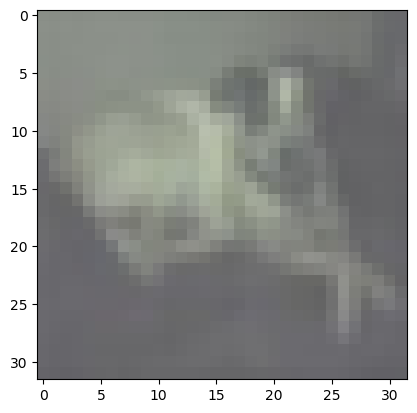

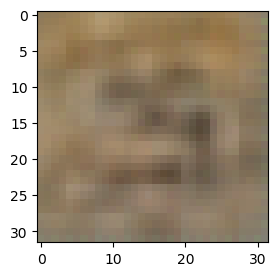

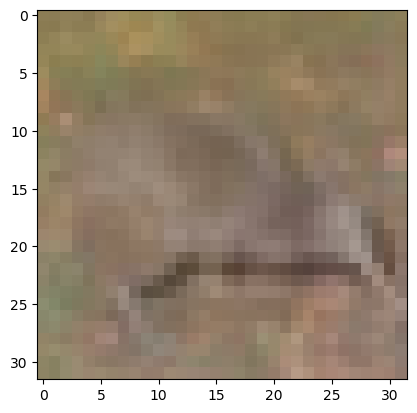

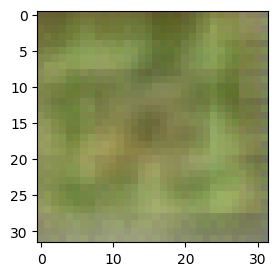

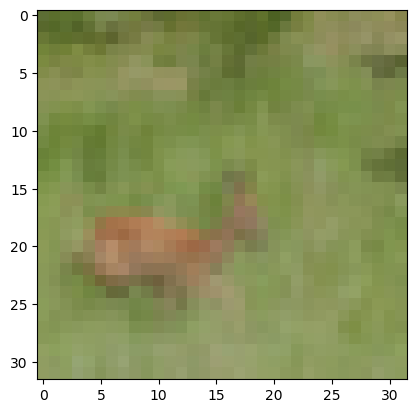

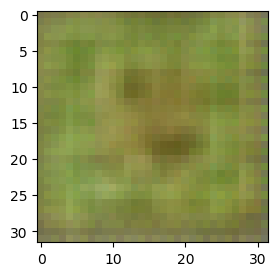

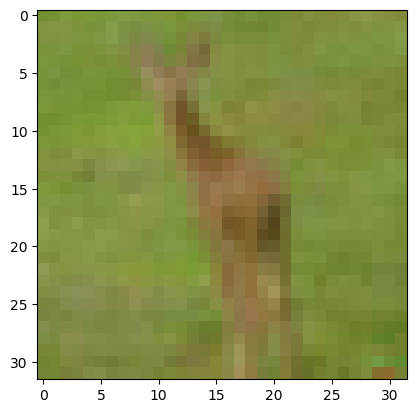

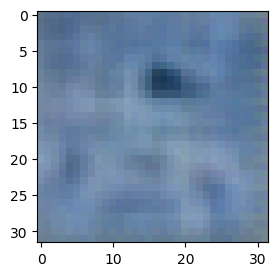

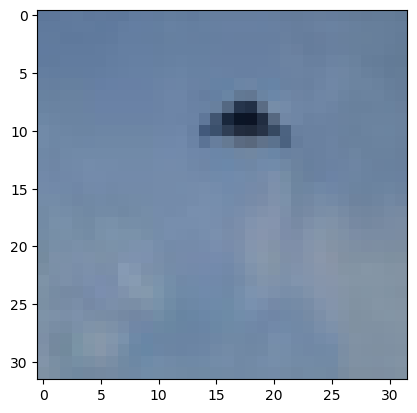

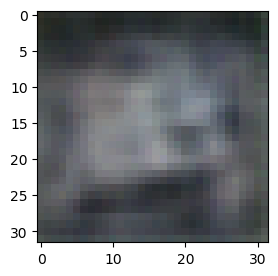

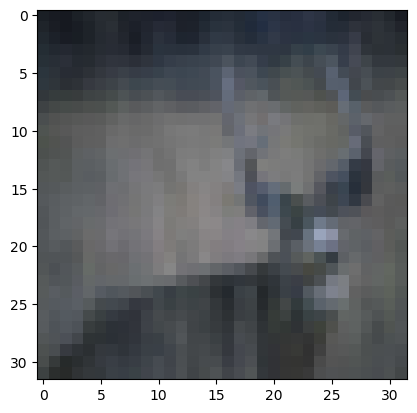

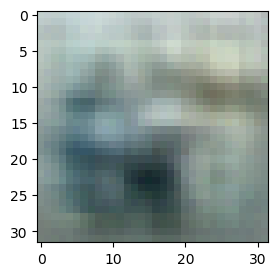

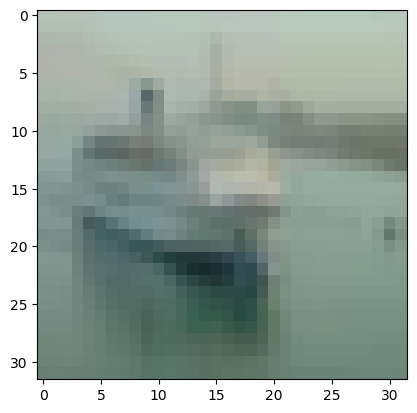

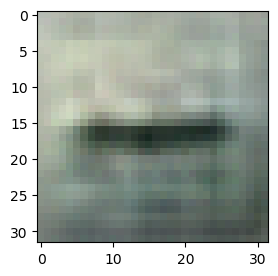

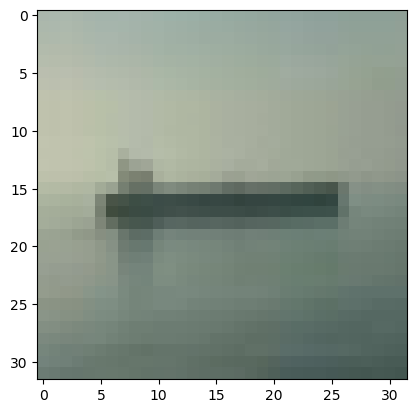

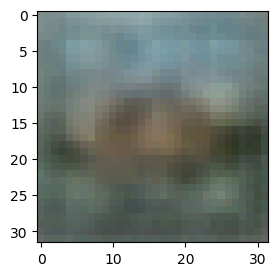

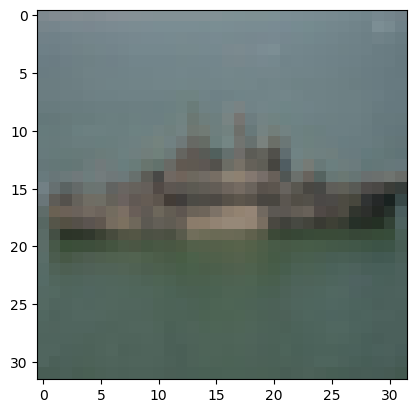

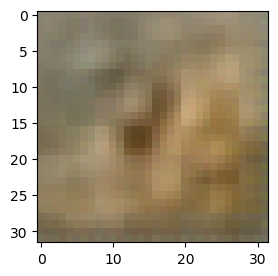

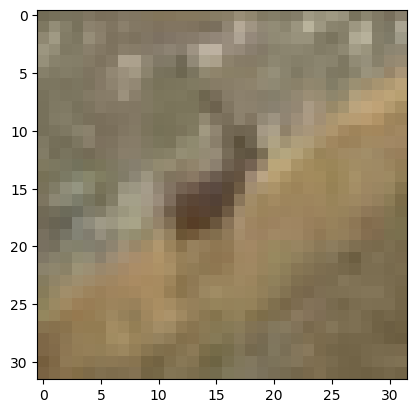

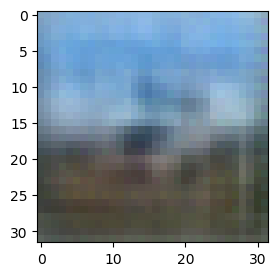

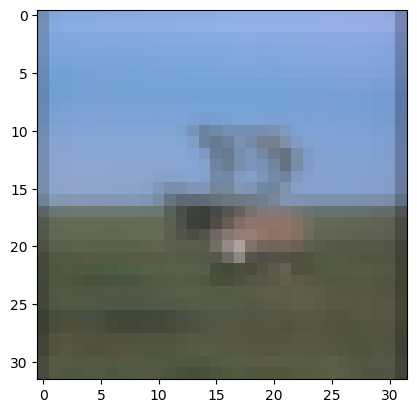

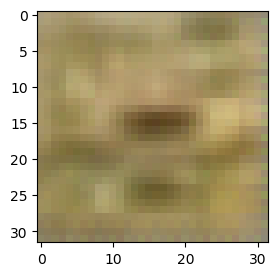

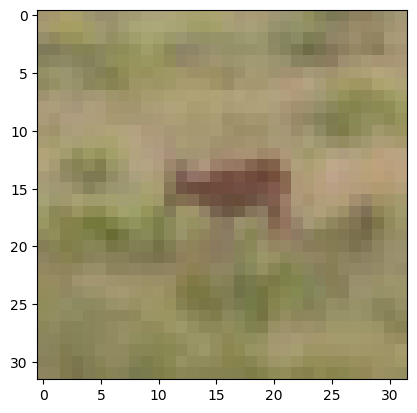

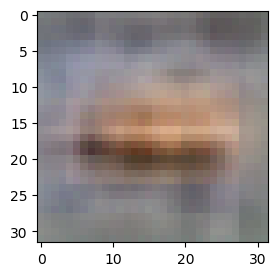

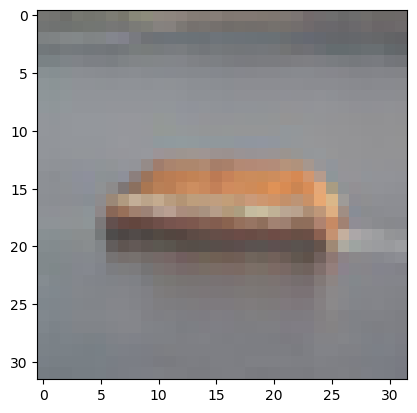

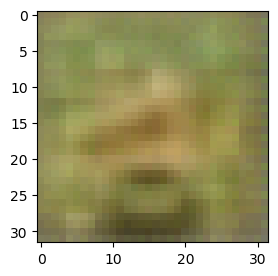

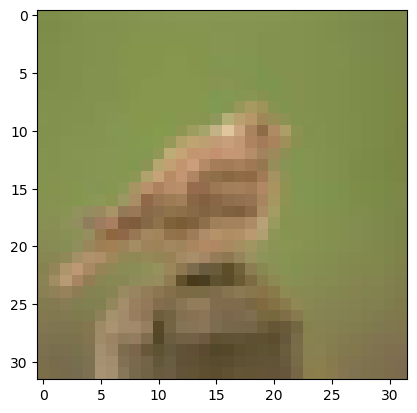

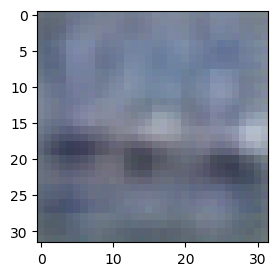

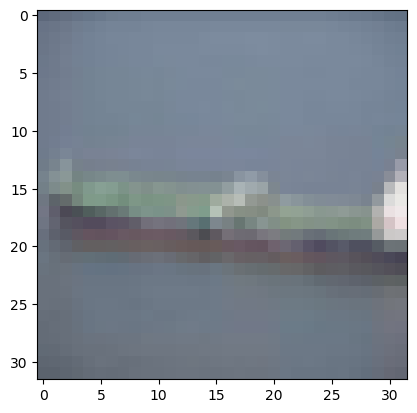

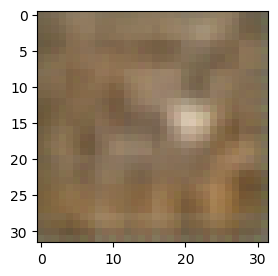

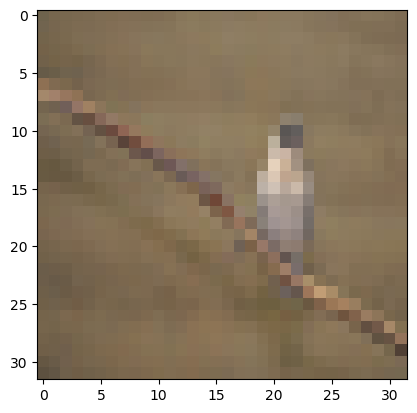

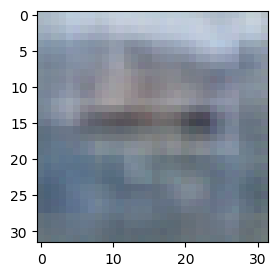

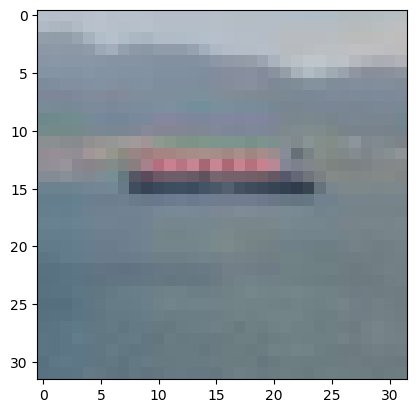

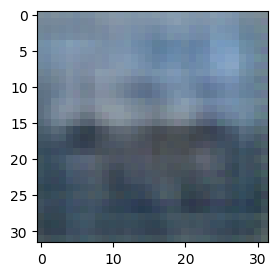

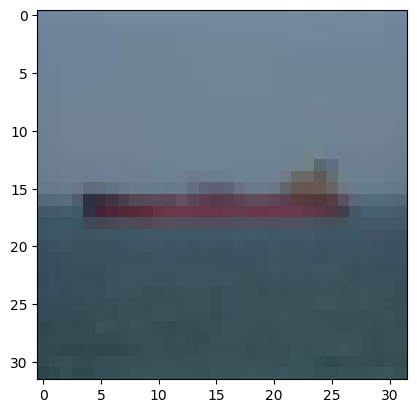

In [26]:
plt.style.use('default')
loss_sorted = sorted(results_autoencode, key=lambda tup: tup[3], reverse=False)[:30]
for img, oimg, recon, loss in loss_sorted:
    plt.figure(figsize=(3,3))
    imshow(torchvision.utils.make_grid(recon.detach()))
    imshow(torchvision.utils.make_grid(oimg))

In [24]:
# Varying hyperparameters (Batchsize, learningrate) 3 values for each
hypertest_vals = [(8, 0.001), (32, 0.001), (64, 0.001), (64, 0.001), (64, 0.0025), (64, 0.005)]
# Storage
hyper_outputs = []
# Training using the different combinations of parameters
for batch_size, lr in hypertest_vals:
    myAE=Autoencoder()
    print("Testing hyperparameters with batchsize: %d, lr: %.3f" %(batch_size, lr))
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=False, num_workers=2, sampler=torch.utils.data.sampler.SubsetRandomSampler(subset_indices))
    trainorig, trainnoise, _ = preparedata(trainloader, scale)
    optimizer = torch.optim.Adam(myAE.parameters(), lr=lr, weight_decay=1e-5)
    running_loss = 0
    #Start training
    for epoch in range(max_epochs):
        for i, data in enumerate((trainnoise)):
            img = data
            oimg = trainorig[i]
            optimizer.zero_grad()
            recon = myAE(img)
            loss = criterion(recon, oimg)
            loss.backward()
            optimizer.step()
    # Testing on the noisy data
    for i, data in enumerate((testnoise)):
        img = data
        oimg = testorig[i]
        recon = myAE(img)
        loss = criterion(recon, oimg)
        running_loss += loss.item()
    hyper_outputs.append(('{},{:.4f}'.format(batch_size, lr), running_loss/len(testnoise)))
print("Done")

Testing hyperparameters with batchsize: 8, lr: 0.001



Testing hyperparameters with batchsize: 32, lr: 0.001



Testing hyperparameters with batchsize: 64, lr: 0.001



Testing hyperparameters with batchsize: 64, lr: 0.001



Testing hyperparameters with batchsize: 64, lr: 0.003



Testing hyperparameters with batchsize: 64, lr: 0.005



Done


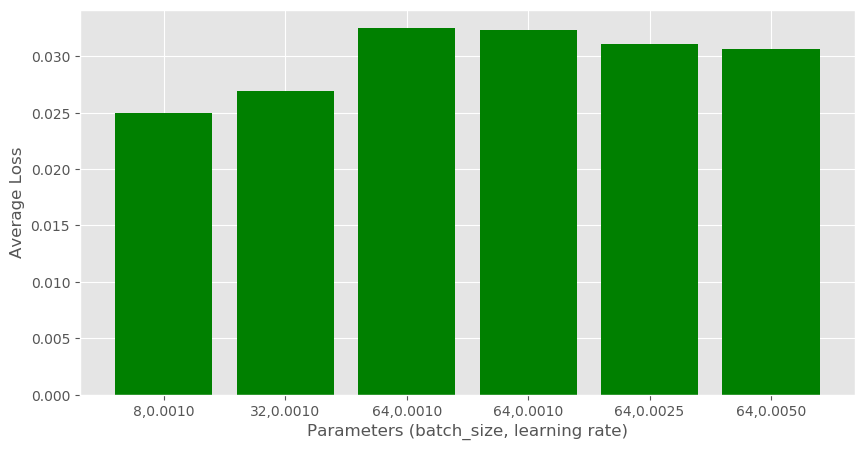

In [25]:
plt.style.use('ggplot')

plt.figure(figsize=(10,5))
labels = [data[0] for data in hyper_outputs]
loss = [data[1] for data in hyper_outputs]
y_pos = np.arange(len(hyper_outputs))
plt.bar(y_pos, loss, color='green')
plt.xticks(y_pos, labels)
plt.ylabel('Average Loss')
plt.xlabel('Parameters (batch_size, learning rate)')
plt.show()

### Interesting Observations (4e)

- One interesting observation I made while training the Autoencoder to denoise images, was that training the encoder on only a small sample of the training data had minimal impact on performance. Following on from this training on a subset massively reduced training time, this was also true for batch sizes. Feeding large batches into the Autoencoder made the training faster but this did have an effect on classification performance.
- When testing the various hyperparameters if a too large learning rate was used the loss would often bounce between values and never decrease. In addition at very large values of learning rate the loss would sometimes start to increase.
- The best combination of parameters was batch_size = 8 and learning rate = 0.001
- Finally, when I changed the activation functions in the neural network to be Tahn() rather than RelU() I saw a massive performance increase.